In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [2]:
articles = pd.read_csv('../Data/ukraine_textcontain_before_new.csv')
authors = pd.read_csv('../Data/ukraine_textcontain_before_new_authors.csv')

In [3]:
articles

article_title           author  \
0    All sides should give Russia, Ukraine some spa...  By Global Times   
1    Ukrainian president expects no conflict with R...        By Xinhua   
2    British PM announces sanctions against Russia ...        By Xinhua   
3    NATO chief urges Russia to choose diplomacy in...        By Xinhua   
4    EU agrees Russia sanctions package, warns of f...        By Xinhua   
..                                                 ...              ...   
478  Russia's upper house approves use of military ...        By Xinhua   
479  US sanctions Russia after Putin sends troops t...        By Xinhua   
480  DPP's so-called sympathy for Ukraine 'self-ser...  By Global Times   
481  US hardly leads the West out of helplessness, ...  By Zhao Minghao   
482  Can US’ balancing strategy last after Ukraine ...        Ding Gang   

                       published_time  \
0    Published: Feb 23, 2022 12:55 AM   
1    Published: Feb 23, 2022 09:34 AM   
2    Published: Feb 23, 2022 09:37 AM   
3    Published: Feb 23, 2022 09:41 AM   
4    Published: Feb 23, 2022 09:42 AM   
..                                ...   
478  Published: Feb 23, 2022 09:48 AM   
479  Published: Feb 23, 2022 12:11 PM   
480  Published: Feb 23, 2022 01:17 PM   
481  Published: Feb 23, 2022 03:34 PM   
482  Published: Feb 23, 2022 05:30 PM   

                                          article_text article_category_one  \
0    United Nations Security Council meets after Ru...              OPINION   
1    Ukrainian President Volodymyr Zelensky attends...                WORLD   
2    British Prime Minister Boris Johnson Photo: VC...                WORLD   
3    NATO Secretary General Jens Stoltenberg speaks...                WORLD   
4    European Commission President Ursula von der L...                WORLD   
..                                                 ...                  ...   
478  Russian President Vladimir Putin signs documen...                WORLD   
479  U.S. President Joe Biden walks out from the So...                WORLD   
480  Tsai Ing-wen Photo:AFPThe secessionist DPP aut...                CHINA   
481  Outgoing Munich Security Conference Chairman W...              OPINION   
482  An exhibition on US President Richard Nixon's ...              OPINION   

    article_category_two                                picture_description  
0              EDITORIAL  United Nations Security Council meets after Ru...  
1                 EUROPE  Ukrainian President Volodymyr Zelensky attends...  
2                 EUROPE    British Prime Minister Boris Johnson Photo: VCG  
3                 EUROPE  NATO Secretary General Jens Stoltenberg speaks...  
4                 EUROPE  European Commission President Ursula von der L...  
..                   ...                                                ...  
478               EUROPE  Russian President Vladimir Putin signs documen...  
479             AMERICAS  U.S. President Joe Biden walks out from the So...  
480              SOCIETY                             Tsai Ing-wen Photo:AFP  
481            VIEWPOINT  Outgoing Munich Security Conference Chairman W...  
482           COLUMNISTS  An exhibition on US President Richard Nixon's ...  

[483 rows x 7 columns]

In [4]:
# date published
articles['published_time'] = articles['published_time'].str[11:]
articles['published_time'] = articles['published_time'].str[:12]
#to date mmm dd, yyyy
articles['published_time'] = pd.to_datetime(articles['published_time'], format='%b %d, %Y')
articles

article_title           author  \
0    All sides should give Russia, Ukraine some spa...  By Global Times   
1    Ukrainian president expects no conflict with R...        By Xinhua   
2    British PM announces sanctions against Russia ...        By Xinhua   
3    NATO chief urges Russia to choose diplomacy in...        By Xinhua   
4    EU agrees Russia sanctions package, warns of f...        By Xinhua   
..                                                 ...              ...   
478  Russia's upper house approves use of military ...        By Xinhua   
479  US sanctions Russia after Putin sends troops t...        By Xinhua   
480  DPP's so-called sympathy for Ukraine 'self-ser...  By Global Times   
481  US hardly leads the West out of helplessness, ...  By Zhao Minghao   
482  Can US’ balancing strategy last after Ukraine ...        Ding Gang   

    published_time                                       article_text  \
0       2022-02-23  United Nations Security Council meets after Ru...   
1       2022-02-23  Ukrainian President Volodymyr Zelensky attends...   
2       2022-02-23  British Prime Minister Boris Johnson Photo: VC...   
3       2022-02-23  NATO Secretary General Jens Stoltenberg speaks...   
4       2022-02-23  European Commission President Ursula von der L...   
..             ...                                                ...   
478     2022-02-23  Russian President Vladimir Putin signs documen...   
479     2022-02-23  U.S. President Joe Biden walks out from the So...   
480     2022-02-23  Tsai Ing-wen Photo:AFPThe secessionist DPP aut...   
481     2022-02-23  Outgoing Munich Security Conference Chairman W...   
482     2022-02-23  An exhibition on US President Richard Nixon's ...   

    article_category_one article_category_two  \
0                OPINION            EDITORIAL   
1                  WORLD               EUROPE   
2                  WORLD               EUROPE   
3                  WORLD               EUROPE   
4                  WORLD               EUROPE   
..                   ...                  ...   
478                WORLD               EUROPE   
479                WORLD             AMERICAS   
480                CHINA              SOCIETY   
481              OPINION            VIEWPOINT   
482              OPINION           COLUMNISTS   

                                   picture_description  
0    United Nations Security Council meets after Ru...  
1    Ukrainian President Volodymyr Zelensky attends...  
2      British Prime Minister Boris Johnson Photo: VCG  
3    NATO Secretary General Jens Stoltenberg speaks...  
4    European Commission President Ursula von der L...  
..                                                 ...  
478  Russian President Vladimir Putin signs documen...  
479  U.S. President Joe Biden walks out from the So...  
480                             Tsai Ing-wen Photo:AFP  
481  Outgoing Munich Security Conference Chairman W...  
482  An exhibition on US President Richard Nixon's ...  

[483 rows x 7 columns]

In [5]:
#stats published time
articles['author'].unique()

array(['By Global Times', 'By Xinhua', 'By Zhao Minghao', 'Ding Gang',
       'By Oleg Ivanov', 'By Yin Yeping and Liu Yang', 'By Shen Yi',
       'Yang Sheng', 'Zhao Yusha', 'By VCG', 'By GT staff reporters',
       'By Lü Xiang', 'By Zhang Hong', 'By Wen Sheng', 'By Xia Wenxin',
       'By George N. Tzogopoulos', 'By Reuters', 'By AFP', 'By Cong Ge',
       'Hu Xijin', 'By Qian Feng', 'Wang Qi', 'Wang Wenwen',
       'By GT Staff reporters', 'By Yuri Tavrovsky', 'Chen Qingqing',
       'By Fabio Massimo Parenti', 'Zhang Hui', 'By Agencies',
       'By Sergey Biryukov', 'By Mu Lu', 'By Sputnik News', 'Hu Yuwei',
       'Xu Keyue', 'By Wang Shuo', 'By Sputniknews', 'By Scott Ritter',
       'Liu Xin', 'By Xin Ping', 'By Cui Hongjian',
       'By Sheradil Baktygulov', 'By Danil Bochkov', 'By Wang Fan',
       'By Wei Dongxu', 'Liu Xuanzun', 'By Li Qingqing',
       'By sputniknews.com', 'Andrey Kortunov', 'By Zhang Han',
       'By Guan Guoping', 'By Zhang Han and Xu Yelu', 'By Long Xin

In [6]:
# celan authors
articles['author'] = articles['author'].apply(lambda x: x[3:] if x.startswith("By ") else x)
articles

article_title        author  \
0    All sides should give Russia, Ukraine some spa...  Global Times   
1    Ukrainian president expects no conflict with R...        Xinhua   
2    British PM announces sanctions against Russia ...        Xinhua   
3    NATO chief urges Russia to choose diplomacy in...        Xinhua   
4    EU agrees Russia sanctions package, warns of f...        Xinhua   
..                                                 ...           ...   
478  Russia's upper house approves use of military ...        Xinhua   
479  US sanctions Russia after Putin sends troops t...        Xinhua   
480  DPP's so-called sympathy for Ukraine 'self-ser...  Global Times   
481  US hardly leads the West out of helplessness, ...  Zhao Minghao   
482  Can US’ balancing strategy last after Ukraine ...     Ding Gang   

    published_time                                       article_text  \
0       2022-02-23  United Nations Security Council meets after Ru...   
1       2022-02-23  Ukrainian President Volodymyr Zelensky attends...   
2       2022-02-23  British Prime Minister Boris Johnson Photo: VC...   
3       2022-02-23  NATO Secretary General Jens Stoltenberg speaks...   
4       2022-02-23  European Commission President Ursula von der L...   
..             ...                                                ...   
478     2022-02-23  Russian President Vladimir Putin signs documen...   
479     2022-02-23  U.S. President Joe Biden walks out from the So...   
480     2022-02-23  Tsai Ing-wen Photo:AFPThe secessionist DPP aut...   
481     2022-02-23  Outgoing Munich Security Conference Chairman W...   
482     2022-02-23  An exhibition on US President Richard Nixon's ...   

    article_category_one article_category_two  \
0                OPINION            EDITORIAL   
1                  WORLD               EUROPE   
2                  WORLD               EUROPE   
3                  WORLD               EUROPE   
4                  WORLD               EUROPE   
..                   ...                  ...   
478                WORLD               EUROPE   
479                WORLD             AMERICAS   
480                CHINA              SOCIETY   
481              OPINION            VIEWPOINT   
482              OPINION           COLUMNISTS   

                                   picture_description  
0    United Nations Security Council meets after Ru...  
1    Ukrainian President Volodymyr Zelensky attends...  
2      British Prime Minister Boris Johnson Photo: VCG  
3    NATO Secretary General Jens Stoltenberg speaks...  
4    European Commission President Ursula von der L...  
..                                                 ...  
478  Russian President Vladimir Putin signs documen...  
479  U.S. President Joe Biden walks out from the So...  
480                             Tsai Ing-wen Photo:AFP  
481  Outgoing Munich Security Conference Chairman W...  
482  An exhibition on US President Richard Nixon's ...  

[483 rows x 7 columns]

In [7]:
articles['article_text'] = articles.apply(lambda x: x['article_text'].replace(x['picture_description'], ''), axis=1)
articles

article_title        author  \
0    All sides should give Russia, Ukraine some spa...  Global Times   
1    Ukrainian president expects no conflict with R...        Xinhua   
2    British PM announces sanctions against Russia ...        Xinhua   
3    NATO chief urges Russia to choose diplomacy in...        Xinhua   
4    EU agrees Russia sanctions package, warns of f...        Xinhua   
..                                                 ...           ...   
478  Russia's upper house approves use of military ...        Xinhua   
479  US sanctions Russia after Putin sends troops t...        Xinhua   
480  DPP's so-called sympathy for Ukraine 'self-ser...  Global Times   
481  US hardly leads the West out of helplessness, ...  Zhao Minghao   
482  Can US’ balancing strategy last after Ukraine ...     Ding Gang   

    published_time                                       article_text  \
0       2022-02-23  Russian President Vladimir Putin on Monday sig...   
1       2022-02-23   Ukrainian President Volodymyr Zelensky said o...   
2       2022-02-23   British Prime Minister Boris Johnson announce...   
3       2022-02-23   The chief of the North Atlantic Treaty Organi...   
4       2022-02-23   The European Union (EU) is ready to take furt...   
..             ...                                                ...   
478     2022-02-23   The Russian Federation Council, or the upper ...   
479     2022-02-23   U.S. President Joe Biden on Tuesday announced...   
480     2022-02-23  The secessionist DPP authority's so-called "sy...   
481     2022-02-23  The Munich Security Conference 2022 was held u...   
482     2022-02-23  On February 21, 1972, US President Richard Nix...   

    article_category_one article_category_two  \
0                OPINION            EDITORIAL   
1                  WORLD               EUROPE   
2                  WORLD               EUROPE   
3                  WORLD               EUROPE   
4                  WORLD               EUROPE   
..                   ...                  ...   
478                WORLD               EUROPE   
479                WORLD             AMERICAS   
480                CHINA              SOCIETY   
481              OPINION            VIEWPOINT   
482              OPINION           COLUMNISTS   

                                   picture_description  
0    United Nations Security Council meets after Ru...  
1    Ukrainian President Volodymyr Zelensky attends...  
2      British Prime Minister Boris Johnson Photo: VCG  
3    NATO Secretary General Jens Stoltenberg speaks...  
4    European Commission President Ursula von der L...  
..                                                 ...  
478  Russian President Vladimir Putin signs documen...  
479  U.S. President Joe Biden walks out from the So...  
480                             Tsai Ing-wen Photo:AFP  
481  Outgoing Munich Security Conference Chairman W...  
482  An exhibition on US President Richard Nixon's ...  

[483 rows x 7 columns]

In [8]:
#drop duplicates
authors.drop_duplicates(inplace=True)
#merge articles and authors
df =  articles.join(authors.set_index('author_name'), on='author', how='left')
df.replace(pd.NA, 'Author details not found', inplace=True)
df

article_title        author  \
0    All sides should give Russia, Ukraine some spa...  Global Times   
1    Ukrainian president expects no conflict with R...        Xinhua   
2    British PM announces sanctions against Russia ...        Xinhua   
3    NATO chief urges Russia to choose diplomacy in...        Xinhua   
4    EU agrees Russia sanctions package, warns of f...        Xinhua   
..                                                 ...           ...   
478  Russia's upper house approves use of military ...        Xinhua   
479  US sanctions Russia after Putin sends troops t...        Xinhua   
480  DPP's so-called sympathy for Ukraine 'self-ser...  Global Times   
481  US hardly leads the West out of helplessness, ...  Zhao Minghao   
482  Can US’ balancing strategy last after Ukraine ...     Ding Gang   

    published_time                                       article_text  \
0       2022-02-23  Russian President Vladimir Putin on Monday sig...   
1       2022-02-23   Ukrainian President Volodymyr Zelensky said o...   
2       2022-02-23   British Prime Minister Boris Johnson announce...   
3       2022-02-23   The chief of the North Atlantic Treaty Organi...   
4       2022-02-23   The European Union (EU) is ready to take furt...   
..             ...                                                ...   
478     2022-02-23   The Russian Federation Council, or the upper ...   
479     2022-02-23   U.S. President Joe Biden on Tuesday announced...   
480     2022-02-23  The secessionist DPP authority's so-called "sy...   
481     2022-02-23  The Munich Security Conference 2022 was held u...   
482     2022-02-23  On February 21, 1972, US President Richard Nix...   

    article_category_one article_category_two  \
0                OPINION            EDITORIAL   
1                  WORLD               EUROPE   
2                  WORLD               EUROPE   
3                  WORLD               EUROPE   
4                  WORLD               EUROPE   
..                   ...                  ...   
478                WORLD               EUROPE   
479                WORLD             AMERICAS   
480                CHINA              SOCIETY   
481              OPINION            VIEWPOINT   
482              OPINION           COLUMNISTS   

                                   picture_description  \
0    United Nations Security Council meets after Ru...   
1    Ukrainian President Volodymyr Zelensky attends...   
2      British Prime Minister Boris Johnson Photo: VCG   
3    NATO Secretary General Jens Stoltenberg speaks...   
4    European Commission President Ursula von der L...   
..                                                 ...   
478  Russian President Vladimir Putin signs documen...   
479  U.S. President Joe Biden walks out from the So...   
480                             Tsai Ing-wen Photo:AFP   
481  Outgoing Munich Security Conference Chairman W...   
482  An exhibition on US President Richard Nixon's ...   

                 author_title  \
0    Author details not found   
1    Author details not found   
2    Author details not found   
3    Author details not found   
4    Author details not found   
..                        ...   
478  Author details not found   
479  Author details not found   
480  Author details not found   
481  Author details not found   
482    Author title not found   

                                    author_description  
0                             Author details not found  
1                             Author details not found  
2                             Author details not found  
3                             Author details not found  
4                             Author details not found  
..                                                 ...  
478                           Author details not found  
479                           Author details not found  
480                           Author details not found  
481                           Author details n

In [9]:
# Saving data to csv
df.to_csv('../Data/ukraine_textcontain_before_new_preprocessed.csv')

In [10]:
#senance count
df['sentence_count'] = df['article_text'].apply(lambda x: len(x.split('.')) - 1)

In [11]:
#word count using tokenization
#remove stopwords
stop_words = set(stopwords.words('english'))

In [12]:
#word count using tokenization
df['word_count'] = df['article_text'].apply(lambda x: len([word for word in word_tokenize(x) if word.isalpha()]))

In [13]:
# part of speech count using tokenization wihout stopwords
nltk.download('averaged_perceptron_tagger')
df['pos_count'] = df['article_text'].apply(lambda x: FreqDist([tag for word, tag in nltk.pos_tag(word_tokenize(x)) if word.isalpha() and word not in stop_words]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
df['pos_count'].tolist()

[FreqDist({'NN': 90, 'NNP': 67, 'JJ': 55, 'NNS': 47, 'VBN': 28, 'VB': 27, 'RB': 20, 'VBD': 14, 'DT': 14, 'IN': 9, ...}),
 FreqDist({'NNP': 28, 'NN': 15, 'JJ': 10, 'VBD': 6, 'NNS': 4, 'VBG': 3, 'VBZ': 2, 'VB': 2, 'CD': 2, 'RB': 2, ...}),
 FreqDist({'NNP': 32, 'JJ': 14, 'NNS': 14, 'NN': 10, 'VBD': 8, 'VB': 7, 'VBN': 5, 'VBG': 5, 'MD': 3, 'NNPS': 2, ...}),
 FreqDist({'NNP': 44, 'NN': 28, 'JJ': 19, 'VB': 12, 'VBD': 12, 'NNS': 11, 'RB': 5, 'VBN': 4, 'DT': 2, 'VBP': 2, ...}),
 FreqDist({'NN': 76, 'NNP': 72, 'JJ': 40, 'NNS': 27, 'VBD': 15, 'VB': 14, 'VBG': 12, 'VBZ': 7, 'VBN': 6, 'RB': 6, ...}),
 FreqDist({'NNP': 37, 'NN': 24, 'JJ': 14, 'NNS': 10, 'VBD': 8, 'RB': 6, 'VBG': 4, 'DT': 2, 'VBN': 2, 'VB': 2, ...}),
 FreqDist({'NNP': 70, 'NN': 34, 'NNS': 20, 'JJ': 17, 'VBD': 16, 'VB': 9, 'VBG': 6, 'RB': 6, 'CD': 5, 'VBN': 3, ...}),
 FreqDist({'NNP': 27, 'NN': 26, 'JJ': 16, 'NNS': 13, 'VBG': 7, 'VBD': 4, 'RB': 4, 'IN': 3, 'VB': 2, 'VBN': 2, ...}),
 FreqDist({'NNP': 86, 'NN': 82, 'JJ': 57, 'NNS': 32,

In [15]:
#pos count to data frame
df_pos = pd.DataFrame(df['pos_count'].tolist())
df_pos.fillna(0, inplace=True)
df_pos['sentence_count'] = df['sentence_count']
df_pos['word_count'] = df['word_count']
df_pos

JJ   NNP   VBD   CD   NNS   VBG    VB     NN    DT   VBN  ...  PRP$  \
0    55.0  67.0  14.0  1.0  47.0   7.0  27.0   90.0  14.0  28.0  ...   0.0   
1    10.0  28.0   6.0  2.0   4.0   3.0   2.0   15.0   0.0   1.0  ...   0.0   
2    14.0  32.0   8.0  2.0  14.0   5.0   7.0   10.0   1.0   5.0  ...   0.0   
3    19.0  44.0  12.0  2.0  11.0   1.0  12.0   28.0   2.0   4.0  ...   0.0   
4    40.0  72.0  15.0  4.0  27.0  12.0  14.0   76.0   3.0   6.0  ...   0.0   
..    ...   ...   ...  ...   ...   ...   ...    ...   ...   ...  ...   ...   
478  14.0  37.0   8.0  1.0  10.0   4.0   2.0   24.0   2.0   2.0  ...   0.0   
479  17.0  70.0  16.0  5.0  20.0   6.0   9.0   34.0   0.0   3.0  ...   0.0   
480  16.0  27.0   4.0  0.0  13.0   7.0   2.0   26.0   1.0   2.0  ...   0.0   
481  57.0  86.0   8.0  0.0  32.0  17.0  12.0   82.0  13.0   8.0  ...   0.0   
482  44.0  84.0  15.0  3.0  24.0  15.0  26.0  100.0   7.0  13.0  ...   0.0   

      EX  WDT   LS   ``  RBS    $  SYM  sentence_count  word_count  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0              38         705  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0               5         136  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0               7         197  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0              10         247  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0              25         474  
..   ...  ...  ...  ...  ...  ...  ...             ...         ...  
478  0.0  0.0  0.0  0.0  0.0  0.0  0.0               7         182  
479  0.0  0.0  0.0  0.0  0.0  0.0  0.0              20         313  
480  0.0  0.0  0.0  0.0  0.0  0.0  0.0               6         182  
481  0.0  0.0  0.0  0.0  0.0  0.0  0.0              34         575  
482  0.0  0.0  0.0  0.0  0.0  0.0  0.0              34         655  

[483 rows x 39 columns]

## Visualizations

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go


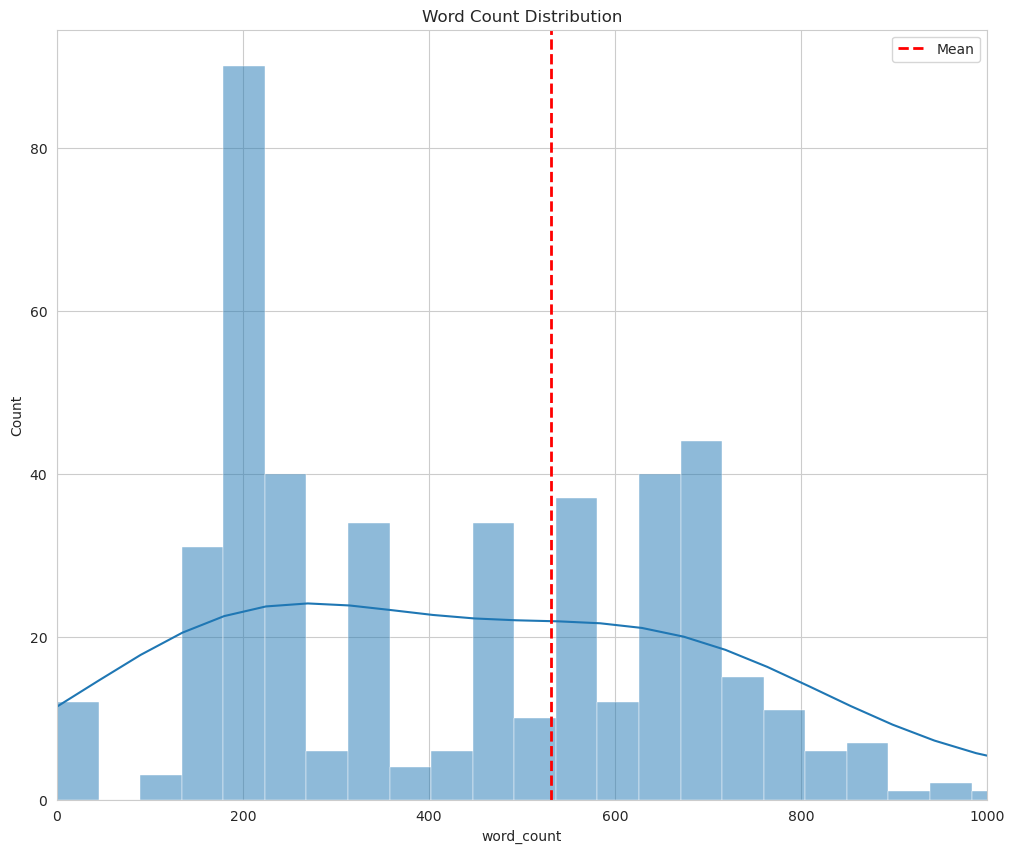

In [17]:
#word count; cut at 1000
plt.figure(figsize=(12, 10))
sns.histplot(df['word_count'], bins=200, kde=True)
plt.xlim(0, 1000)
#mean line
plt.axvline(df['word_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Word Count Distribution')
plt.show()

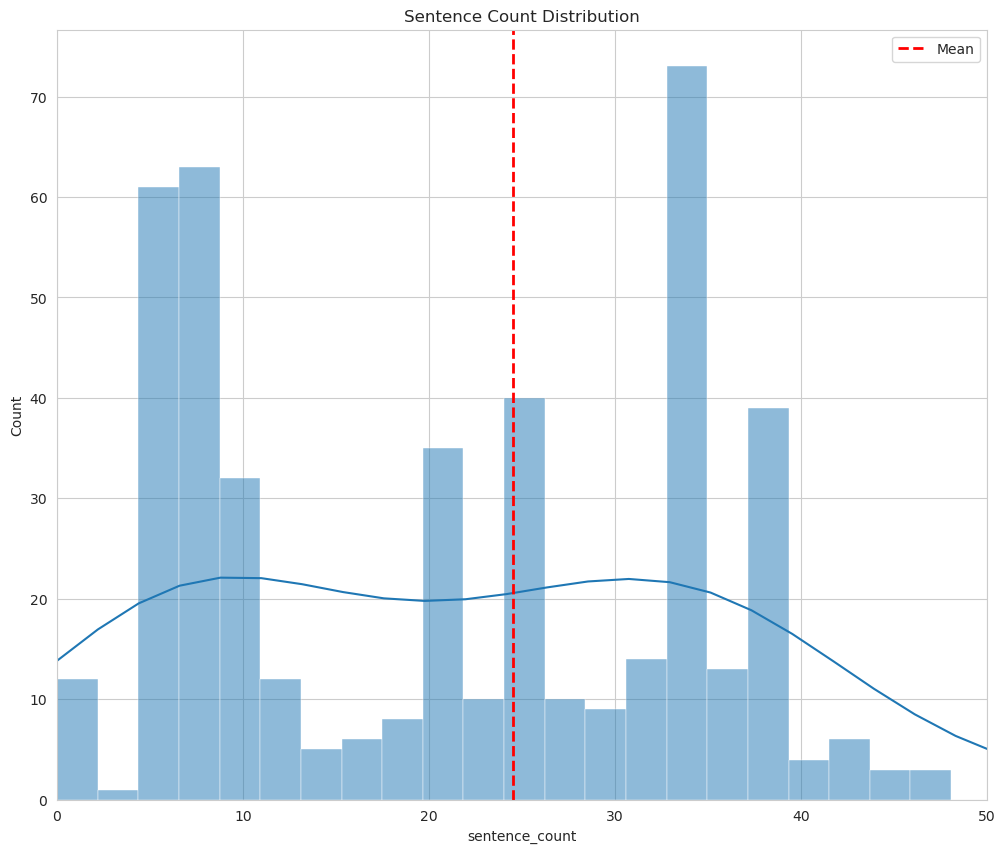

In [18]:
#sentence count; cut at 100
plt.figure(figsize=(12, 10))
sns.histplot(df['sentence_count'], bins=200, kde=True)
plt.xlim(0, 50)
#mean line
plt.axvline(df['sentence_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Sentence Count Distribution')
plt.show()


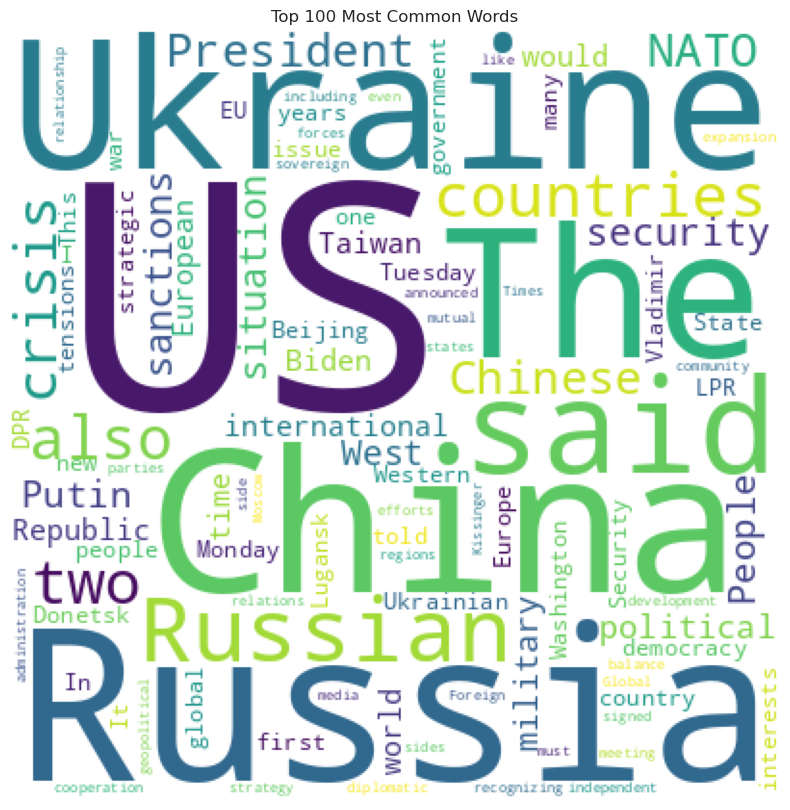

In [19]:
#wordcloud form freqdist
fdist = FreqDist([word for word in word_tokenize(' '.join(df['article_text'])) if word.isalpha() and word not in stop_words])
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

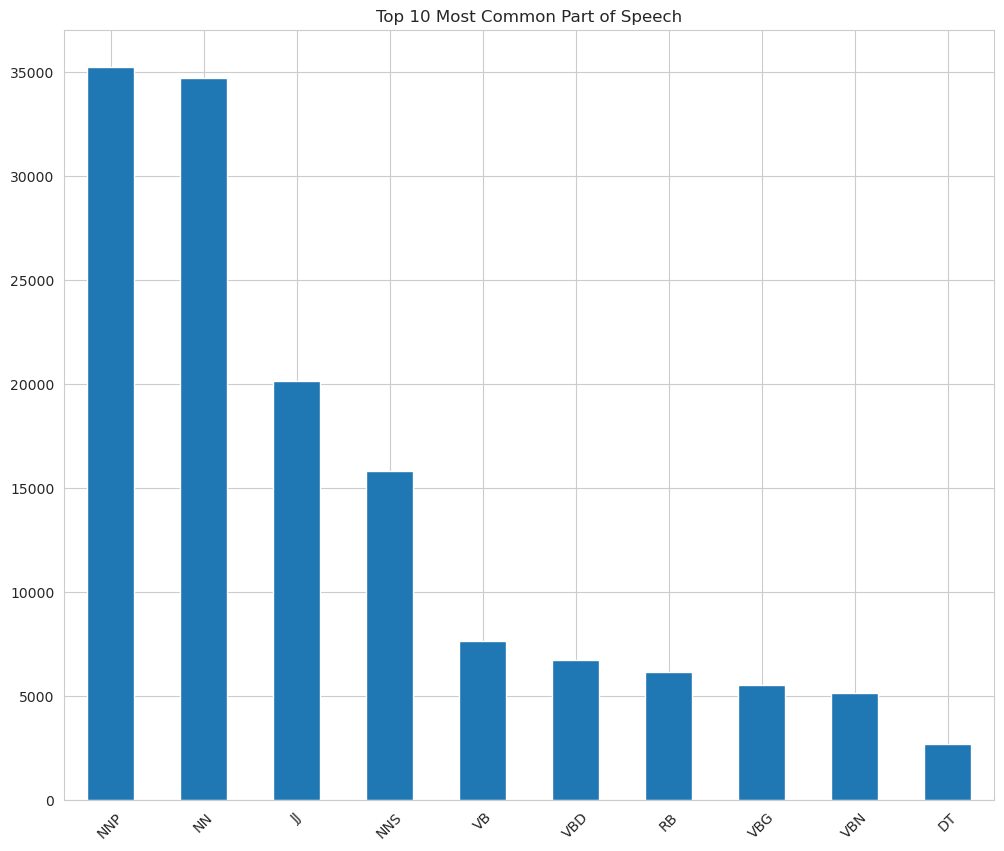

In [20]:
#top 10 most common part of speech
plt.figure(figsize=(12, 10))
df_pos.drop(columns=['sentence_count', 'word_count']).sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Most Common Part of Speech')
#turn x labels
plt.xticks(rotation=45)
plt.show()

### Total POS

In [35]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="RB" and word.isalpha() and word not in stop_words])

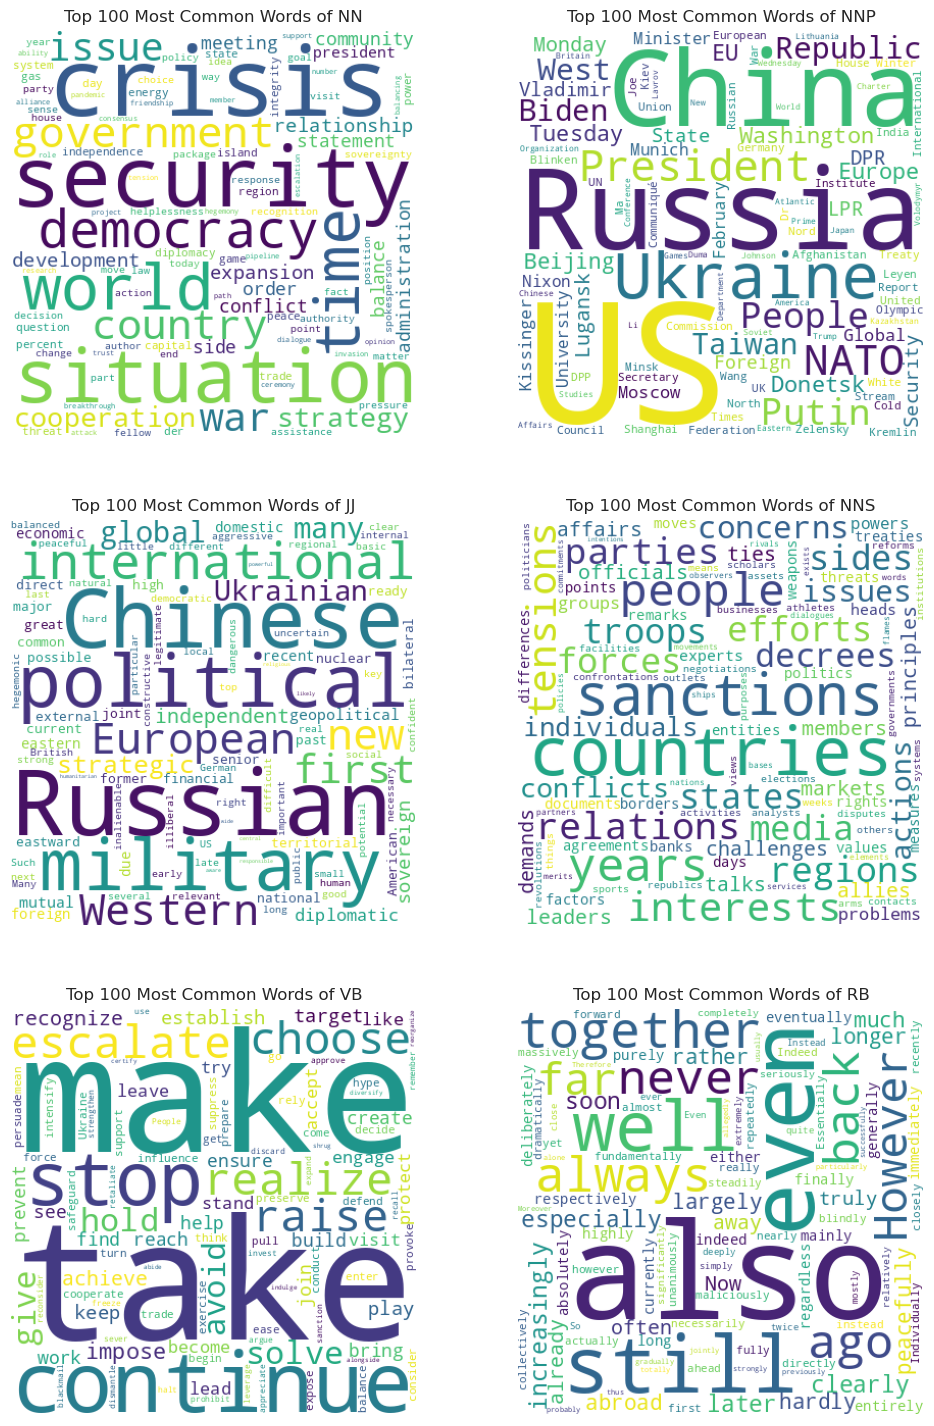

In [36]:
plt.figure(figsize=(12, 18))
plt.subplot(3, 2, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(3, 2, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(3, 2, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(3, 2, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(3, 2, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(3, 2, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


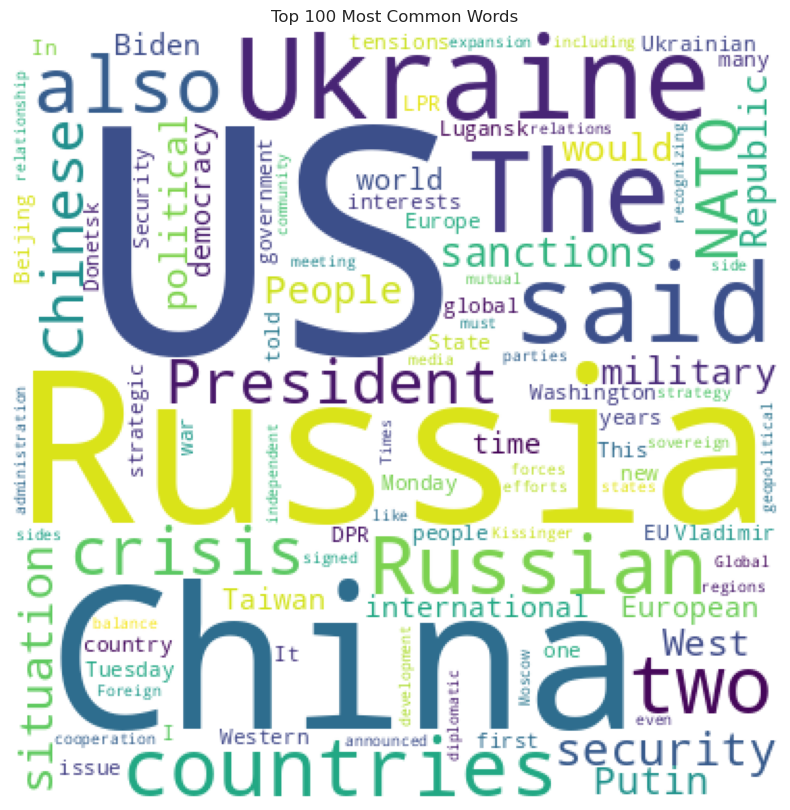

In [37]:
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

Text(0.5, 1.0, 'Article Categories')

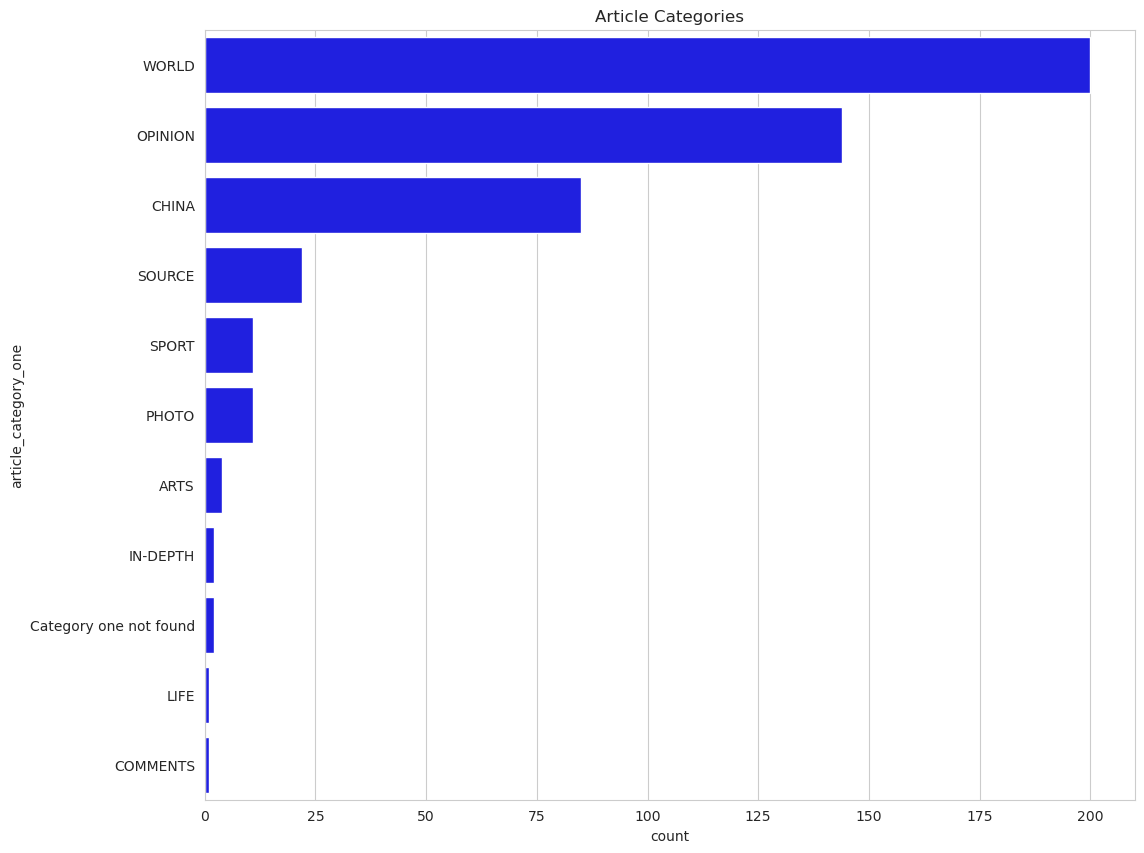

In [38]:
#sns countplot for article categories
plt.figure(figsize=(12, 10))
sns.countplot(y=df['article_category_one'], order=df['article_category_one'].value_counts().index, color='blue')
plt.title('Article Categories')


In [1]:
#plot for category one = opinion
#3 plots in a row
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.countplot(x=df[df['article_category_one'] == 'OPINION']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'OPINION']['article_category_two'].value_counts().index )
plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.title('OPINION Subcategories')

plt.subplot(1, 3, 2)
sns.countplot(x=df[df['article_category_one'] == 'WORLD']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'WORLD']['article_category_two'].value_counts().index)
plt.title('WORLD Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 300)

plt.subplot(1, 3, 3)
sns.countplot(x=df[df['article_category_one'] == 'CHINA']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'CHINA']['article_category_two'].value_counts().index)
plt.title('CHINA Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\lukas\AppData\Local\Temp\ipykernel_26276\1188434541.py", line 3, in <module>
    plt.figure(figsize=(15, 10))
    ^^^
NameError: name 'plt' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

### POS: diplomacy vs columnists

In [40]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="RB" and word.isalpha() and word not in stop_words])


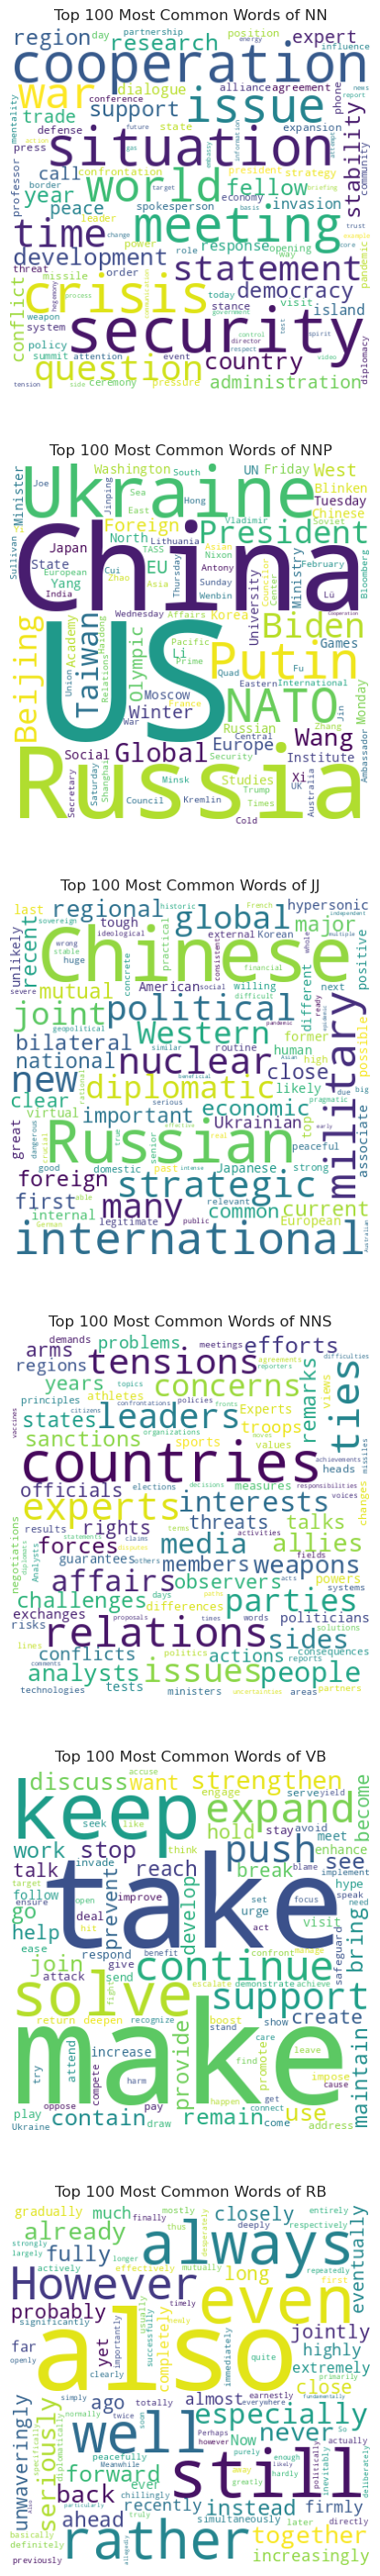

In [41]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


In [42]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="RB" and word.isalpha() and word not in stop_words])


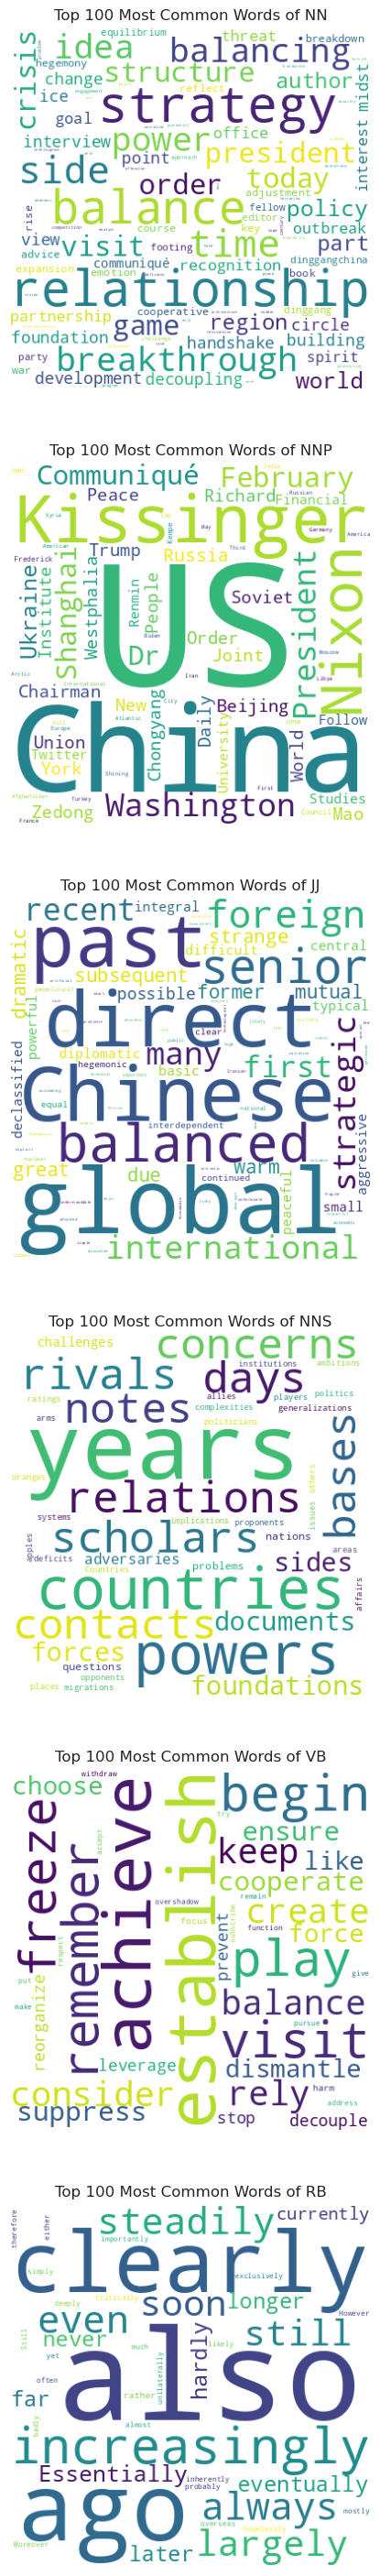

In [43]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()
